## <center> Portuguese Bank Telemarketing Analytics

## Part 1. Project Overview

Nowadays, marketing expenditure in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

### Main Objective: increase the effectiveness of the bank's telemarketing campaign
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans. 

By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers. 

## Part 2. Data Cleaning <a id="2"></a>

![clean](https://www.geeksforgeeks.org/wp-content/uploads/ml.png)

## Load the raw data

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. It is publicly available in the UCI Machine Learning Repository, which can be retrieved from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from scipy.stats import zscore

In [5]:
df = pd.read_csv("bank_raw.csv", sep=";")

In [ ]:
df

In [ ]:
df.shape

There are 45,211 observations in this dataset. Each represents an existing customer that the bank reached via phone calls. 
* For each observation, the dataset records **16 input variables** that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, account balance, and the number of contacts. 
* There is **a single binary output variable** that denotes “yes” or “no” revealing the outcomes of the phone calls.

In [ ]:
df['y'].value_counts()

In [ ]:
df['y'].value_counts(normalize=True)*100

Only 11% of the total customers have subscribed to the term deposit plan

In [ ]:
df.info()

### Cleaning the dataset

In [ ]:
df['poutcome'].value_counts(normalize=True)

#### Dropping the poutcome column since 81% of the values are unknown

In [ ]:
df.drop(columns=['poutcome'], inplace=True)

In [ ]:
df['job'].value_counts()

In [ ]:
df['education'].value_counts()

#### Fill 'unknown' in the job and education column to 'other'

In [ ]:
df[['job','education']] = df[['job','education']].replace({'unknown':'other'})

In [ ]:
df['education'].value_counts()

In [15]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
other             288
Name: job, dtype: int64

#### Purifying the job column

In [16]:
df['job']=df['job'].replace({'admin.':'admin'})

In [17]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin            5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
other             288
Name: job, dtype: int64

#### Checking for duplicate rows and deleting them (0 in total)

In [24]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

<AxesSubplot:xlabel='balance', ylabel='Density'>

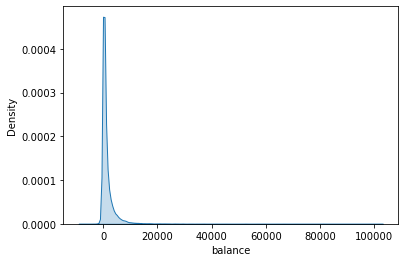

In [18]:
# Create a density plot
sns.kdeplot(df['balance'], shade=True)

In [19]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<AxesSubplot:>

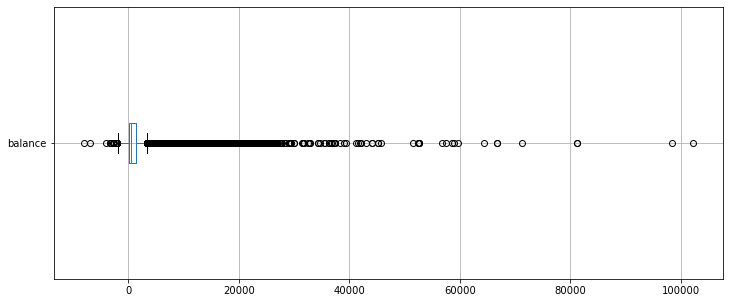

In [20]:
df.boxplot('balance', vert=0, figsize='12,5')

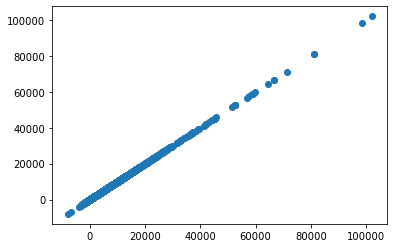

In [21]:
plt.scatter(y=df['balance'], x=df['balance'])

#### Checking pdays column

In [25]:
df['pdays'].value_counts(normalize=True).head()*100

-1      81.736745
 182     0.369379
 92      0.325142
 91      0.278693
 183     0.278693
Name: pdays, dtype: float64

In [26]:
df.loc[(df['pdays']==-1) & (df['y']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
83,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
86,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,yes
168,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes


In [16]:
#Percentage of -1 values
3384/5289*100

63.98184912081679

Insights:<br>
    As we can see that huge percentage of data (80%) is '-1' meaning the client was not previously contacted. In the cases where the client was previously contacted, which is a very small fraction of the entire data, 'No' and 'Yes' is almost same. So we can drop this column, as it isnt contributing any value for the prediction.

#### Dropping the pdays column

In [28]:
df.drop(columns=['pdays'],inplace=True)

In [29]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,0,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,no


#### Changing 'month' column from string to numbers for easier analysis

In [30]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [31]:
df['month']=df['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,0,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,5,92,1,0,no
4,33,other,single,other,no,1,no,no,unknown,5,5,198,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,0,no


#### Since the customers are contacted every day, the feature does not add value to the analysis. Hence we drop day column

In [24]:
df['day'].nunique()

31

In [33]:
df.drop(columns=['day'],inplace=True)

In [34]:
df

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,76,1,0,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,92,1,0,no
4,33,other,single,other,no,1,no,no,unknown,5,198,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,11,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,11,456,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,11,1127,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,11,508,4,0,no


#### Checking contact column

In [35]:
df['contact'].value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [36]:
df.loc[(df['contact']=='cellular') & (df['y']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,y
12662,28,blue-collar,single,secondary,no,-127,yes,no,cellular,7,1044,3,0,yes
12684,49,blue-collar,married,primary,no,-157,yes,no,cellular,7,491,3,0,yes
12685,55,blue-collar,married,secondary,no,49,yes,no,cellular,7,494,4,0,yes
12686,51,technician,married,secondary,no,216,no,no,cellular,7,615,2,0,yes
12718,39,technician,single,secondary,no,506,yes,no,cellular,7,718,2,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,11,300,1,8,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,11,386,2,0,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,11,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,11,456,2,0,yes


In [26]:
df.loc[(df['contact']=='unknown') & (df['y']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44489,31,blue-collar,married,secondary,no,0,yes,no,unknown,10,aug,97,1,782,1,other,yes
44550,29,self-employed,single,tertiary,no,814,no,no,unknown,13,aug,461,1,-1,0,unknown,yes
44615,34,admin.,single,tertiary,no,625,no,yes,unknown,31,aug,34,1,-1,0,unknown,yes
44687,52,management,married,unknown,no,1708,no,no,unknown,6,sep,310,1,75,4,failure,yes


In [28]:
((4369+530)/5289)*100

92.62620533182076

Insights:<br>
    As we can see that high percenatge of data(64%) is 'cellular' meaning the client was contacted on their cellular compared to 'telephone' which is barely 6%. While the rest remain unknown. The total percenatge of clients who subscrbied when the calling medium is either cellular or unknown is almost 93%. Hence, this does not stand up to be a deciding factor for the predictive analysis. So we can drop this column, as it isnt contributing any value for the prediction.

#### Dropping the contact column

In [30]:
df.drop(columns=['contact'],inplace=True)

#### Changing the column name from 'y' to a meaningful name 'deposit'

In [41]:
df.rename(columns={'y':'deposit'}, inplace=True)

#### Checking other columns

In [38]:
df['marital'].value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [39]:
df['education'].value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
other        0.041074
Name: education, dtype: float64

In [40]:
df['marital'].value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

#### Defining a function to convert the categorical column to a new binary numerial column

In [42]:
def convert(df, new_column, old_column):
    df[new_column] = df[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()

#### Getting the binary deposit column

In [43]:
convert(df,'binary_deposit','deposit')

0    39922
1     5289
Name: binary_deposit, dtype: int64

In [44]:
df

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,deposit,binary_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,261,1,0,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,151,1,0,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,76,1,0,no,0
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,92,1,0,no,0
4,33,other,single,other,no,1,no,no,unknown,5,198,1,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,11,977,3,0,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,11,456,2,0,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,11,1127,5,3,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,11,508,4,0,no,0


In [47]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration'>

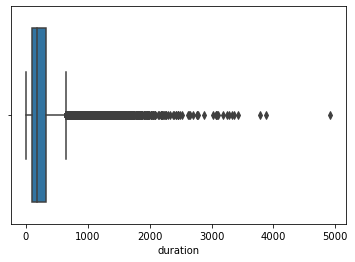

In [48]:
sns.boxplot(df['duration'])

#### Changing the unit of 'duration' from seconds to minutes

In [49]:
df['duration'] = df['duration'].apply(lambda n: n/60).round(2)

In [50]:
df['duration'].describe()

count    45211.000000
mean         4.302729
std          4.292132
min          0.000000
25%          1.720000
50%          3.000000
75%          5.320000
max         81.970000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration'>

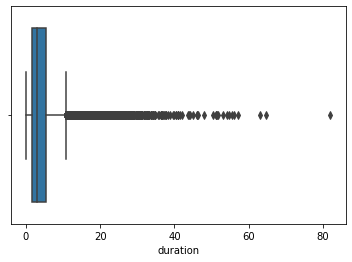

In [51]:
sns.boxplot(df['duration'])

#### Dropping rows whose 'duration' < 30s

In [52]:
condition = (df['duration']<30/60)

In [53]:
df[condition]

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit
42,60,blue-collar,married,other,no,104,yes,no,5,0.37,1,0,no,0
57,47,blue-collar,married,other,no,306,yes,no,5,0.22,1,0,no,0
82,42,technician,single,secondary,no,690,yes,no,5,0.33,1,0,no,0
107,34,admin,married,secondary,no,61,no,yes,5,0.35,1,0,no,0
177,34,technician,married,secondary,no,51,yes,no,5,0.32,2,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45027,39,services,single,secondary,no,471,no,no,10,0.08,1,0,no,0
45061,30,self-employed,single,secondary,no,1031,no,no,10,0.12,1,0,no,0
45062,58,retired,married,primary,no,742,no,no,10,0.08,1,0,no,0
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,10,0.28,1,0,no,0


In [54]:
df[condition & df['binary_deposit']==1]

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit
24103,58,management,divorced,tertiary,no,372,no,yes,10,0.18,1,0,yes,1
27715,23,unemployed,single,primary,no,1003,no,no,11,0.13,1,0,yes,1
44061,53,services,divorced,secondary,no,36,yes,yes,7,0.42,1,1,yes,1
44123,27,technician,single,secondary,no,337,no,no,7,0.38,1,0,yes,1


In [56]:
df.drop(df[condition].index, inplace=True)

In [57]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1
45208,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43264 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43264 non-null  int64  
 1   job             43264 non-null  object 
 2   marital         43264 non-null  object 
 3   education       43264 non-null  object 
 4   default         43264 non-null  object 
 5   balance         43264 non-null  int64  
 6   housing         43264 non-null  object 
 7   loan            43264 non-null  object 
 8   month           43264 non-null  int64  
 9   duration        43264 non-null  float64
 10  campaign        43264 non-null  int64  
 11  previous        43264 non-null  int64  
 12  deposit         43264 non-null  object 
 13  binary_deposit  43264 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 5.0+ MB


#### Getting the binary default, housing and loan columns

In [59]:
convert(df,'binary_default','default')
convert(df,'binary_housing','housing')
convert(df,'binary_loan','loan')

0    36302
1     6962
Name: binary_loan, dtype: int64

In [60]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0
45207,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0
45208,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0


#### Checking for outliers in balance column

In [63]:
df['balance_outliers'] = df['balance']

In [64]:
df['balance_outliers']= zscore(df['balance_outliers'])

In [65]:
condition1 = (df['balance_outliers']>3) | (df['balance_outliers']<-3 )

In [67]:
df1=df[condition1]

In [68]:
df1['deposit'].value_counts()

no     594
yes    118
Name: deposit, dtype: int64

<AxesSubplot:xlabel='balance'>

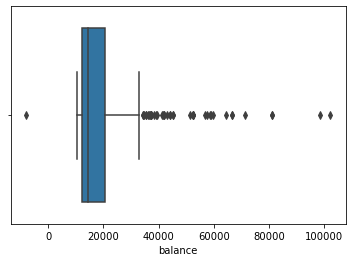

In [71]:
sns.boxplot(df1['balance'])

In [74]:
df.drop(columns="balance_outliers", inplace=True)

In [75]:
df1.to_csv("Balance_Outliers.csv")

In [77]:
df.to_csv("Bank_with_Balance_Outliers.csv",index=False)

In [78]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0
45207,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0
45208,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0


## Part 3. Exploratory Data Analysis <a id="3"></a>

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

<img src='https://static.wixstatic.com/media/e42cce_756b090fe40548eda9148fd5599980bb~mv2.gif' width='450'>

In [61]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'deposit',
       'binary_deposit', 'binary_default', 'binary_housing', 'binary_loan'],
      dtype='object')

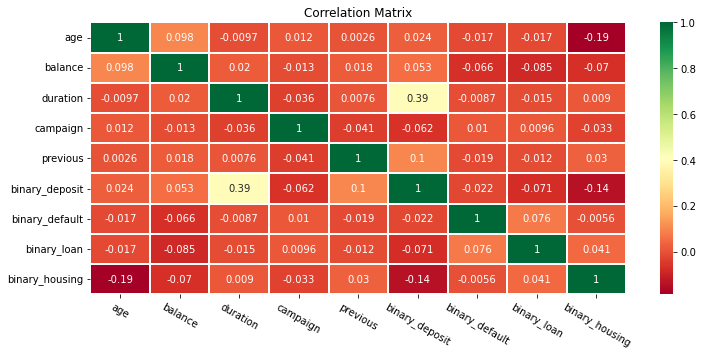

In [62]:
corr_data = df[['age','balance','duration','campaign','previous','binary_deposit',
                'binary_default','binary_loan','binary_housing']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [4]:
df = pd.read_csv("Bank_with_Balance_Outliers.csv")

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0
43261,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0
43262,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0


In [43]:
cat_vars=list()
num_vars=list()
for col in df.drop(columns='deposit'):
    if (df[col].dtype=='O'):
        cat_vars.append(col)
    else:
        num_vars.append(col)

In [7]:
print(cat_vars)

['job', 'marital', 'education', 'default', 'housing', 'loan']


In [8]:
print(num_vars)

['age', 'balance', 'month', 'duration', 'campaign', 'previous', 'binary_deposit', 'binary_default', 'binary_housing', 'binary_loan']


In [9]:
num_vars_df=df[num_vars]

In [44]:
cat_vars_df=df[cat_vars]

In [120]:
num_vars_df

,age,balance,month,duration,campaign,previous,binary_deposit,binary_default,binary_housing,binary_loan
0,58,2143,5,4.35,1,0,0,0,1,0
1,44,29,5,2.52,1,0,0,0,1,0
2,33,2,5,1.27,1,0,0,0,1,1
3,47,1506,5,1.53,1,0,0,0,1,0
4,33,1,5,3.30,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
43259,51,825,11,16.28,3,0,1,0,0,0
43260,71,1729,11,7.60,2,0,1,0,0,0
43261,72,5715,11,18.78,5,3,1,0,0,0
43262,57,668,11,8.47,4,0,0,0,0,0


In [121]:
cat_vars_df

,job,marital,education,default,housing,loan,balance_status
0,management,married,tertiary,no,yes,no,very high
1,technician,single,secondary,no,yes,no,low
2,entrepreneur,married,secondary,no,yes,yes,very low
3,blue-collar,married,other,no,yes,no,high
4,other,single,other,no,no,no,very low
...,...,...,...,...,...,...,...
43259,technician,married,tertiary,no,no,no,high
43260,retired,divorced,primary,no,no,no,high
43261,retired,married,secondary,no,no,no,very high
43262,blue-collar,married,secondary,no,no,no,medium


In [40]:
deposit_yes_df = df[df.deposit=='yes']

In [7]:
df.balance.quantile(np.arange(0.0,1.1,0.1))

0.0   -8019.0
0.1       0.0
0.2      19.0
0.3     123.0
0.4     258.0
0.5     426.0
0.6     663.0
0.7    1040.5
0.8    1690.0
0.9    3052.0
1.0    8514.0
Name: balance, dtype: float64

In [9]:
df.balance.quantile(np.arange(0.1,0.2,0.01))

0.10     0.0
0.11     0.0
0.12     0.0
0.13     0.0
0.14     0.0
0.15     0.0
0.16     0.0
0.17     2.0
0.18     5.0
0.19    11.0
Name: balance, dtype: float64

In [8]:
df["balance_status"] = None

In [10]:
df["balance_status"].loc[(df['balance']>=df.balance.quantile(0.0)) & 
                         (df['balance']<=df.balance.quantile(0.15))] = 'negative'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.15)) & 
                         (df['balance']<=df.balance.quantile(0.4))] = 'low'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.4)) & 
                         (df['balance']<=df.balance.quantile(0.6))] = 'medium'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.6)) & 
                         (df['balance']<=df.balance.quantile(0.8))] = 'high'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.8)) & 
                         (df['balance']<=df.balance.quantile(1.0))] = 'very high'

In [11]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='balance_status', columns='deposit', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

In [12]:
round(percentages,2)

deposit,no,yes
balance_status,,
high,86.40,13.60
low,90.10,9.90
medium,87.82,12.18
negative,92.78,7.22
very high,82.83,17.17


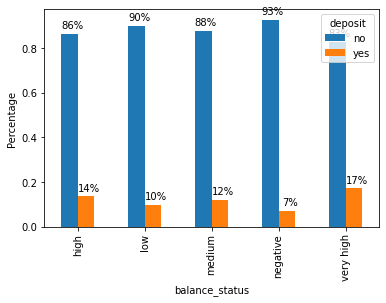

In [13]:
# Create pivot table of counts
pivot_table = pd.pivot_table(df, index='balance_status', columns='deposit', aggfunc='size')

# Calculate percentages
pivot_table = pivot_table.apply(lambda x: x / x.sum(), axis=1)

# Create stacked bar chart
ax = pivot_table.plot(kind='bar')
plt.ylabel('Percentage')

# Loop through the bars and add percentage labels
for i, bar in enumerate(ax.containers):
    for j, subbar in enumerate(bar):
        height = subbar.get_height()
        ax.annotate('{:.0%}'.format(height), xy=((subbar.get_x() + subbar.get_width() / 2)+0.04, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

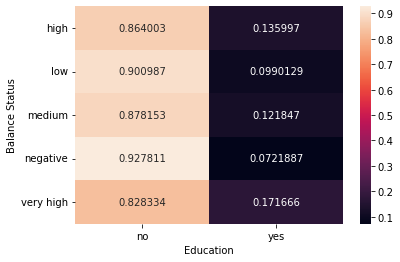

In [14]:
# Create heatmap
sns.heatmap(pivot_table, annot=True, fmt='g')
plt.xlabel('Education')
plt.ylabel('Balance Status')
plt.show()

In [172]:
df.balance.quantile(np.arange(0.0,1.05,0.05))

0.00     -8019.00
0.05      -172.00
0.10         0.00
0.15         0.00
0.20        23.00
0.25        74.00
0.30       132.00
0.35       200.00
0.40       274.00
0.45       355.00
0.50       452.00
0.55       567.00
0.60       705.80
0.65       891.00
0.70      1133.10
0.75      1437.00
0.80      1875.00
0.85      2551.00
0.90      3586.70
0.95      5779.85
1.00    102127.00
Name: balance, dtype: float64

***Insights: target clients with high or very high balance***

To identify the trend more easily, clients are categorized into five groups based on the distribution of percentile of the balance in the dataset:

* Negative Balance: clients with a negative balance (0-15% percentile)
* Low Balance: clients with a balance between 0 and 274 euros (15-40% percentile)
* Medium Balance: clients with a balance between 274 and 705 euros. (40-60% percentile)
* High Balance: clients with a balance between 705 and 1875 euros. (60-80% percentile)
* Very High Balance: clients with a balance greater than 1875 euros. (80-100% percentile)

Unsurprisingly, this bar chart indicates a positive correlation between clients’ balance levels and subscription rate. Clients with negative balances, low and medium balances only returned a subscription rate of 7%, 10% and 12% while clients with high or very high balances had significantly higher subscription rates, nearly 14 and 17% respectively. Hence bank must look for targeting clients' with higher balances particularly when they have a balance of 1875 or more.

However, it is worth noting that in this campaign, more than 50% of clients contacted only have a low balance level according to the usual. Therefore, In the future, the bank should shift its marketing focus to high-balance customers to secure more term deposits. 

## Visualize the relation of 'age' and 'balance'

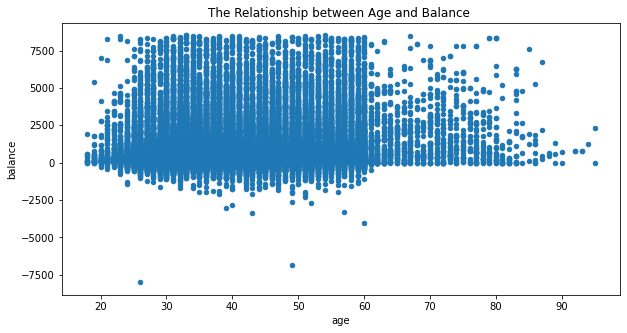

In [15]:
df.plot.scatter('age','balance',figsize = (10,5))
plt.title('The Relationship between Age and Balance ')
plt.show()

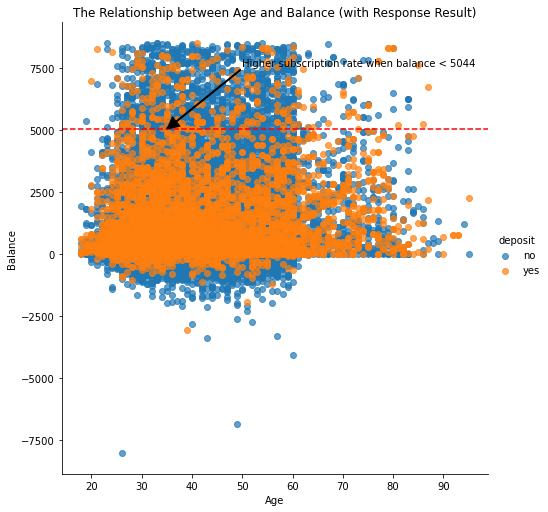

In [18]:
dur_cam = sns.lmplot(x='age', y='balance',data = df,
                     hue = 'deposit',
                     fit_reg = False,
                     scatter_kws={'alpha':0.7}, height =7)

plt.ylabel('Balance')
plt.xlabel('Age')
plt.title('The Relationship between Age and Balance (with Response Result)')

# Calculate the threshold value
threshold = np.percentile(df[df['deposit']=='yes']['balance'], 95)

# Add vertical line to plot at the threshold value
dur_cam.ax.axhline(y=threshold, color='red', linestyle='--')

# Annotation
#plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when balance < 5044', xytext = (50,threshold*1.5),
             arrowprops=dict(color = 'k', width=1), xy= (35,threshold))
plt.show()

In [17]:
threshold

5044.599999999997

<b> Inference: </b>In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, “yes” clients and “no” clients are forming similar clusters. However, we notice that 95% of the clients who subscribed have a balance less than 6840 approximately. Only a 5% of the clients who have a balance equal or more than 5044 have subscribed to the term deposit plan.

This suggests that the bank should focus less on promoting the term deposit plan to people with balance exceeding the range of 5044 approximately.

In [19]:
df.describe()

,age,balance,month,duration,campaign,previous,binary_deposit,binary_default,binary_housing,binary_loan
count,42196.000000,42196.000000,42196.000000,42196.000000,42196.000000,42196.000000,42196.000000,42196.000000,42196.000000,42196.000000
mean,40.912954,1019.545881,6.126339,4.478935,2.582283,0.565883,0.121078,0.018201,0.556877,0.163665
std,10.634702,1553.801896,2.401522,4.297734,2.638406,2.263514,0.326222,0.133678,0.496760,0.369976
min,18.000000,-8019.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,66.750000,5.000000,1.870000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,426.000000,6.000000,3.130000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1317.000000,8.000000,5.470000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,8514.000000,12.000000,81.970000,55.000000,275.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df["age_group"]=None

In [21]:
df["age_group"].loc[df['age']<30]=20
df["age_group"].loc[(df['age']>=30) & (df['age']<=39)]=30
df["age_group"].loc[(df['age']>=40) & (df['age']<=49)]=40
df["age_group"].loc[(df['age']>=50) & (df['age']<=59)]=50
df["age_group"].loc[(df['age']>=60) & (df['age']<=69)]=60
df["age_group"].loc[df['age']>=70]=70

In [22]:
df['age_group']=df['age_group'].astype(int)

In [23]:
df["age_group"].describe()

count    42196.000000
mean        36.417670
std         10.710393
min         20.000000
25%         30.000000
50%         30.000000
75%         40.000000
max         70.000000
Name: age_group, dtype: float64

In [24]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='age_group', columns='deposit', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

In [25]:
percentages

deposit,no,yes
age_group,,
20,81.748435,18.251565
30,88.975073,11.024927
40,90.553716,9.446284
50,90.406046,9.593954
60,70.164788,29.835212
70,57.279693,42.720307


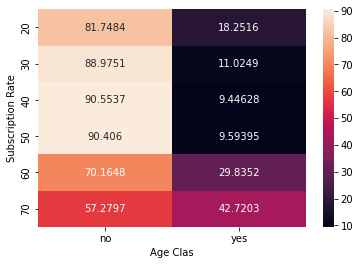

In [26]:
# Create heatmap
sns.heatmap(percentages, annot=True, fmt='g')
plt.xlabel('Age Clas')
plt.ylabel('Subscription Rate')
plt.show()

Text(0, 0.5, 'Percentage')

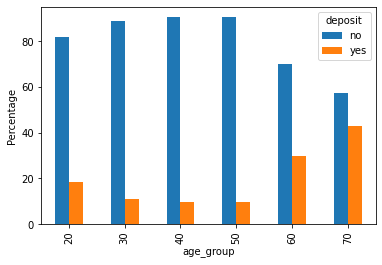

In [27]:
# Create stacked bar chart
percentages.plot(kind='bar')
plt.ylabel('Percentage')

**Insights: Target the youngest and the oldest instead of the middle-aged**

Green vertical bars indicate that clients with a age of 60 and 70+ have the highest subscription rate 30 and 42% respectively. About 18% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients. 

* It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest. 

* The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.

However, red vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future. 

In [28]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='age_group', columns='deposit', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

In [29]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_status'])['binary_deposit'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_status'])['deposit'].count())

age_balance1['deposit'] = age_balance2['deposit']
age_balance1['deposit_rate'] = age_balance1['binary_deposit']/ (age_balance1['deposit'])
age_balance1 = age_balance1.drop(['binary_deposit','deposit'],axis =1)

age_balance1 = age_balance1.unstack()

In [30]:
age_balance1

deposit_rate                                        
balance_status         high       low    medium  negative very high
age_group                                                          
20                 0.212343  0.150713  0.202727  0.106501  0.255350
30                 0.126225  0.097398  0.109835  0.061484  0.156734
40                 0.111957  0.070763  0.087365  0.067214  0.133121
50                 0.095090  0.067838  0.094408  0.065882  0.142480
60                 0.303150  0.268657  0.347150  0.165414  0.333333
70                 0.440678  0.370370  0.402597  0.318182  0.462882

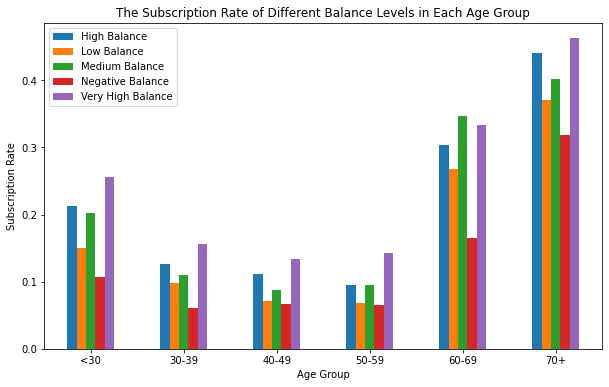

In [31]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(6),('<30', '30-39', '40-49', '50-59', '60-69', '70+'),rotation = 'horizontal')

# Set legend
plt.legend(['High Balance', 'Low Balance', 'Medium Balance', 'Negative Balance', 'Very High Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

**Insights: target older clients with high balance levels**

While age represents a person’s life stage and balance represents a person’s financial condition, jointly evaluating the impact of these two factors enables us to investigate if there is a common trend across all ages, and to identify which combination of client features indicates the highest likelihood of subscription. 

In order to investigate the combined effect of age and balance on a client’s decision, we performed a two-layer grouping, segmenting customers according to their balance levels within each age group.

* The graph tells the same story regarding the subscription rate for different age groups: **the willingness to subscribe is exceptionally high for people aged above 60 and younger people aged below 30** also have a distinguishable higher subscription rate than those of other age groups. 


* Furthermore, **the effect of balance levels on subscription decision is applicable to each individual age group**: every age group shares a common trend that the percentage of subscription increases with balance. 

In sum, the bank should **prioritize its telemarketing to clients who are above 60 years old and have positive balances**, because they have the highest acceptance rate of about 35%. The next group the bank should focus on is **young clients with positive balances**, who showed high subscription rates between 15% and 20%.

## Visualize the subscription rate by job

In [32]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='job', columns='deposit', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

# Print percentages
percentages

deposit,no,yes
job,,
admin,87.438525,12.561475
blue-collar,92.313630,7.686370
entrepreneur,91.383056,8.616944
housemaid,90.758500,9.241500
management,85.786221,14.213779
other,87.878788,12.121212
retired,77.211044,22.788956
self-employed,87.959184,12.040816
services,90.653728,9.346272


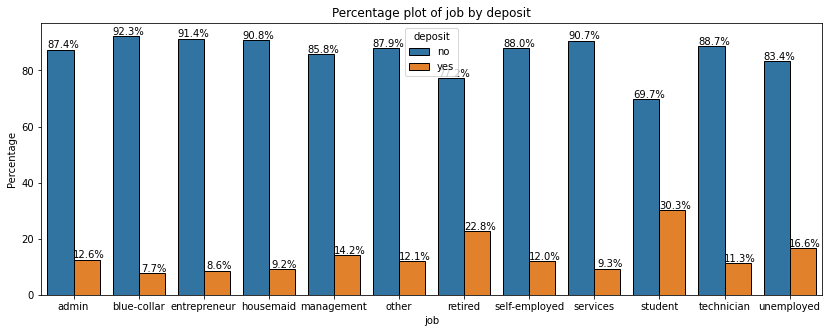

In [33]:
plt.figure(figsize=[14,5])
job_count = df.groupby(['job', 'deposit']).size().reset_index(name='count')
job_count['percent'] = job_count.groupby(['job'])['count'].apply(lambda x: 100*x/np.sum(x))
ax = sns.barplot(x='job', y='percent', hue='deposit', data=job_count, edgecolor="black")
plt.title("Percentage plot of job by deposit")
ax.set_ylabel('Percentage')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), ((p.get_x()+p.get_width()/2.)+0.04, p.get_height()+0.5), ha='center')
plt.show()

**Insights: target students and retired clients**

As noted from the bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older. 

## Visualize the subscription and contact rate by month

In [34]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='month', columns='deposit', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

# Print percentages
percentages

deposit,no,yes
month,,
1,89.810771,10.189229
2,82.478457,17.521543
3,48.026316,51.973684
4,79.898771,20.101229
5,93.013709,6.986291
6,88.951311,11.048689
7,90.751708,9.248292
8,88.754473,11.245527
9,50.190114,49.809886


In [35]:
month = pd.DataFrame(df['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = percentages['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

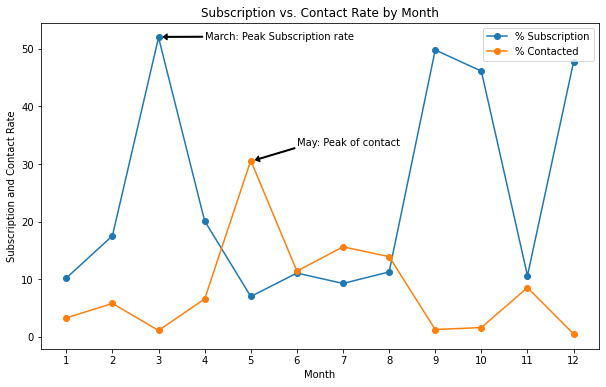

In [36]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

**Insights: initiate the telemarketing campaign in fall or spring**

Besides customer characteristics, external factors may also have an impact on the subscription rate, such as seasons and the time of calling. So the month of contact is also analyzed here.  

This line chart displays the bank’s contact rate in each month as well as clients’ response rate in each month. One way to evaluate the effectiveness of the bank's marketing plan is to see whether these two lines have a similar trend over the same time horizon.
* The bank **contacted most clients between May and August**. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December. 


* However, the subscription rate showed a different trend. **The highest subscription rate occurred in March**, which is over 50%, and all subscription rates in **September, October, and December** are over 40%. 

Clearly, **these two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign**. To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.

Nevertheless, the bank should be cautious when analyzing external factors. More data from previous marketing campaign should be collected and analyzed to make sure that this seasonal effect is constant over time and applicable to the future. 


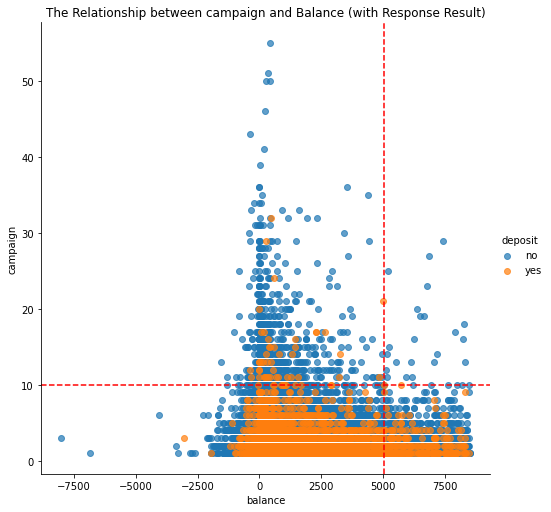

In [37]:
dur_cam = sns.lmplot(x='balance', y='campaign',data = df,
                     hue = 'deposit',
                     fit_reg = False,
                     scatter_kws={'alpha':0.7}, height =7)

plt.ylabel('campaign')
plt.xlabel('balance')
plt.title('The Relationship between campaign and Balance (with Response Result)')

# Calculate the threshold value
threshold = np.percentile(df[df['deposit']=='yes']['campaign'], 99)
threshold1 = np.percentile(df[df['deposit']=='yes']['balance'], 95)

# Add vertical line to plot at the threshold value
dur_cam.ax.axhline(y=threshold, color='red', linestyle='--')
dur_cam.ax.axvline(x=threshold1, color='red', linestyle='--')

In [38]:
threshold,threshold1

(10.0, 5044.599999999997)

In [41]:
deposit_yes_df.campaign.quantile(np.arange(0.1,1.1,0.1))

0.1     1.0
0.2     1.0
0.3     1.0
0.4     1.0
0.5     2.0
0.6     2.0
0.7     2.0
0.8     3.0
0.9     4.0
1.0    32.0
Name: campaign, dtype: float64

In [42]:
deposit_yes_df.campaign.quantile(np.arange(0.9,1.01,0.01))

0.90     4.0
0.91     4.0
0.92     4.0
0.93     5.0
0.94     5.0
0.95     5.0
0.96     6.0
0.97     6.0
0.98     8.0
0.99    10.0
1.00    32.0
Name: campaign, dtype: float64

<b> Inference: </b>In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, 95% of the clients who subscribed i.e, the clients who have a balance less than 6840 approximately have subscribed (99% of them) when the no of calls done is less than or equal to 10 in the entire campaign. We also notice that as the balance increases customers are more likely to subscribe in less no of calls than comapred to negative and low balance clients.

This suggests that the bank should contact an approximate of 10 times at maximum to any customer to sell their term deposit product. Since above 10 very few customers are likely to subscribe. Also if bank wants to cut down on campaign costs, they shoul target the very high balance clients as they require less no of calls comparatively to subscribe.

In [45]:
cat_vars_df

,job,marital,education,default,housing,loan,balance_status
0,management,married,tertiary,no,yes,no,very high
1,technician,single,secondary,no,yes,no,low
2,entrepreneur,married,secondary,no,yes,yes,low
3,blue-collar,married,other,no,yes,no,high
4,other,single,other,no,no,no,low
...,...,...,...,...,...,...,...
42191,technician,married,tertiary,no,no,no,high
42192,retired,divorced,primary,no,no,no,very high
42193,retired,married,secondary,no,no,no,very high
42194,blue-collar,married,secondary,no,no,no,high


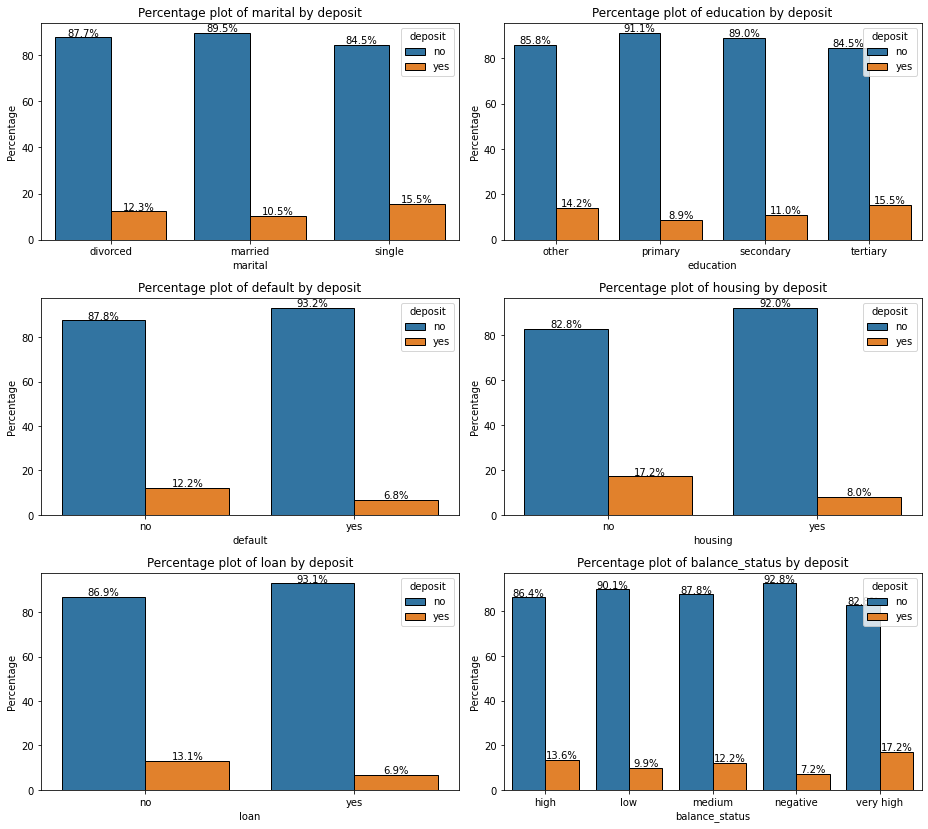

In [46]:
plt.figure(figsize=(13,15))
for i,cat_fea in enumerate(cat_vars_df.drop('job', axis=1)):
    plt.subplot(4,2,i+1)
    cat_count = df.groupby([cat_fea, 'deposit']).size().reset_index(name='count')
    cat_count['percent'] = cat_count.groupby([cat_fea])['count'].apply(lambda x: 100*x/np.sum(x))
    ax = sns.barplot(x=cat_fea, y='percent', hue='deposit', data=cat_count, edgecolor="black")
    plt.title("Percentage plot of {} by deposit".format(cat_fea))
    ax.set_ylabel('Percentage')
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()+0.5), ha='center')
plt.tight_layout()
plt.show()

Insights:<br>
1. Singles are more likely to subscribe to the term deposit as compared to married/divorced.<br>
2. Married and single people are more likely to deposit. <br>
3. People with tertiary education like professional course or university degree are more likely to deposit. <br>
4. Loan, housing, and default don't really contribute much to drawing a strong conclusions. But the bank must try to contact clients who have not taken any housing or any kind of loan and the ones who have defaulters. <br>

In [47]:
df.to_csv("df_wo_balance_outliers.csv", index=False)

# Machine Learning: Classification  <a id= '5'></a>

The main objective of this project is to identify the most responsive customers before the marketing campaign so that the bank will be able to efficiently reach out to them, saving time and marketing resources. To achieve this objective, classification algorithms will be employed. By analyzing customer statistics, a classification model will be built to classify all clients into two groups: "yes" to term deposits and "no" to term deposits.

## Load the cleaned dataset

In [4]:
df = pd.read_csv("df_wo_balance_outliers.csv")

In [5]:
# View the first 5 rows of cleaned data
df.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0,very high,50
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0,low,40
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1,low,30
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0,high,40
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0,low,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42196 entries, 0 to 42195
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             42196 non-null  int64  
 1   job             42196 non-null  object 
 2   marital         42196 non-null  object 
 3   education       42196 non-null  object 
 4   default         42196 non-null  object 
 5   balance         42196 non-null  int64  
 6   housing         42196 non-null  object 
 7   loan            42196 non-null  object 
 8   month           42196 non-null  int64  
 9   duration        42196 non-null  float64
 10  campaign        42196 non-null  int64  
 11  previous        42196 non-null  int64  
 12  deposit         42196 non-null  object 
 13  binary_deposit  42196 non-null  int64  
 14  binary_default  42196 non-null  int64  
 15  binary_housing  42196 non-null  int64  
 16  binary_loan     42196 non-null  int64  
 17  balance_status  42196 non-null 

## Prepare Data for Classification

Only the most relevant customer information is considered, which includes job title, education, age, marital, balance, default record, housing record and loan record. Other information, such as ‘the number of contacts performed before this campaign’, is omitted because it is not directly related to customers themselves.

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'deposit',
       'binary_deposit', 'binary_default', 'binary_housing', 'binary_loan',
       'balance_status', 'age_group'],
      dtype='object')

In [8]:
df1 = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
          'month', 'duration', 'campaign', 'previous', 'balance_status', 'age_group']]

In [9]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,balance_status,age_group
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,very high,50
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,low,40
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,low,30
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,high,40
4,33,other,single,other,no,1,no,no,5,3.30,1,0,low,30


### 5.2 Tranform categorical data into dummy variables

Since machine learning algorithms only take numerical values, all six categorical variables (job, marital, education, default, housing and loan) are transformed into dummy variables.

Dummy variables were used instead of continuous integers because these categorical variables are not ordinal. They simply represent different types rather than levels, so dummy variables are ideal to distinguish the effect of different categories. 

In [10]:
df1 = pd.get_dummies(df1)

In [11]:
df1.head()

,age,balance,month,duration,campaign,previous,age_group,job_admin,job_blue-collar,job_entrepreneur,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,balance_status_high,balance_status_low,balance_status_medium,balance_status_negative,balance_status_very high
0,58,2143,5,4.35,1,0,50,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,44,29,5,2.52,1,0,40,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,33,2,5,1.27,1,0,30,0,0,1,...,0,0,1,0,1,0,1,0,0,0
3,47,1506,5,1.53,1,0,40,0,1,0,...,0,0,1,1,0,1,0,0,0,0
4,33,1,5,3.30,1,0,30,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [12]:
df1.columns

Index(['age', 'balance', 'month', 'duration', 'campaign', 'previous',
       'age_group', 'job_admin', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_other', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_other', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'balance_status_high', 'balance_status_low', 'balance_status_medium',
       'balance_status_negative', 'balance_status_very high'],
      dtype='object')

### Feature selection

In [40]:
df2=df1[l1]

In [41]:
df2=df2.drop(columns='age_group')

In [42]:
X = df2
Y = df.binary_deposit

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [44]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=0)

In [60]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [61]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.885472 (0.003656)
KNN: 0.879755 (0.003433)
CART: 0.854544 (0.003655)
NB: 0.805812 (0.009974)


In [62]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [63]:
predictions = LR.predict(X_test)

In [70]:
# Accuracy Score 
print(accuracy_score(Y_test, predictions))

0.8855450236966824


In [65]:
# Confusion Matrix 
print(confusion_matrix(Y_test, predictions))

[[7252  141]
 [ 825  222]]


In [66]:
cm=confusion_matrix(Y_test, predictions)

<AxesSubplot:>

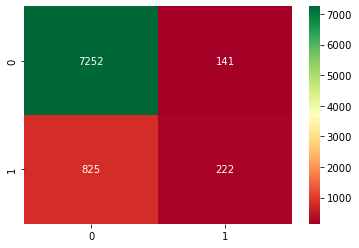

In [67]:
sns.heatmap(cm, annot=True, fmt='.0f',cmap="RdYlGn")

In [68]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7393
           1       0.61      0.21      0.31      1047

    accuracy                           0.89      8440
   macro avg       0.75      0.60      0.63      8440
weighted avg       0.86      0.89      0.86      8440



In [69]:
f1_score(Y_test, predictions)

0.31489361702127655

Classification report shows the precision, recall, F1 and support scores for the LR classification model. 
* Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 88%. 
* Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 100% correctly that they would decline the offer. 

In general, the report shows that **LR model has great predictive power to identify the customers who would not subscribe to the term deposit**. However, because of the limited number of clients accepting the term deposit, there is a **need for stratified sampling or rebalancing to deal with this structural weakness** before we conclude whether LR algorithm can accurately classify those who are more likely to subscribe.

## Weighted Techniques of models

### LogisticRegression

In [71]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier with balanced class weights
lr = LogisticRegression(class_weight='balanced')

# Fit the model to the training data
lr.fit(X_train, Y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      7393
           1       0.35      0.77      0.48      1047

    accuracy                           0.79      8440
   macro avg       0.66      0.78      0.68      8440
weighted avg       0.89      0.79      0.82      8440



In [72]:
print(confusion_matrix(Y_test, y_pred))

[[5892 1501]
 [ 239  808]]


In [73]:
print(f1_score(Y_test, y_pred))

0.4815256257449345


### RandomForestClassifier

In [74]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [75]:
# Create a random forest classifier with balanced class weights
rf = RandomForestClassifier(class_weight='balanced')

# Fit the model to the training data
rf.fit(X_train, Y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7413
           1       0.63      0.24      0.35      1027

    accuracy                           0.89      8440
   macro avg       0.77      0.61      0.65      8440
weighted avg       0.87      0.89      0.87      8440



In [76]:
print(confusion_matrix(Y_test, y_pred))

[[7267  146]
 [ 778  249]]


In [77]:
print(f1_score(Y_test, y_pred))

0.350210970464135


### GradientBoostingClassifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier()

# train the model with sample weights
gb.fit(X_train, Y_train)

# Predict on the test data
y_pred = gb.predict(X_test)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7413
           1       0.63      0.34      0.44      1027

    accuracy                           0.90      8440
   macro avg       0.77      0.66      0.69      8440
weighted avg       0.88      0.90      0.88      8440



In [79]:
print(confusion_matrix(Y_test, y_pred))

[[7204  209]
 [ 676  351]]


In [80]:
print(f1_score(Y_test, y_pred))

0.44234404536862


### SVM

In [17]:
from sklearn.svm import SVC

# Train SVM model with class weighting
svm = SVC(class_weight='balanced')
svm.fit(X_train, Y_train)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[4964 2626]
 [ 548  515]]
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      7590
           1       0.16      0.48      0.25      1063

    accuracy                           0.63      8653
   macro avg       0.53      0.57      0.50      8653
weighted avg       0.81      0.63      0.69      8653



In [18]:
print(f1_score(Y_test, y_pred))

0.24500475737392963


### xgboost

In [81]:
# Import necessary libraries
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[7135  278]
 [ 588  439]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7413
           1       0.61      0.43      0.50      1027

    accuracy                           0.90      8440
   macro avg       0.77      0.69      0.72      8440
weighted avg       0.89      0.90      0.89      8440



In [82]:
print(f1_score(Y_test, y_pred))

0.5034403669724771


# SMOTE Sampling

In [83]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

### Logistic Regression

In [84]:
# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[6406 1007]
 [ 373  654]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7413
           1       0.39      0.64      0.49      1027

    accuracy                           0.84      8440
   macro avg       0.67      0.75      0.69      8440
weighted avg       0.88      0.84      0.85      8440



In [85]:
print(f1_score(Y_test, y_pred))

0.48660714285714285


### RandomForestClassifier

In [86]:
# Train random forest model
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[7094  319]
 [ 600  427]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7413
           1       0.57      0.42      0.48      1027

    accuracy                           0.89      8440
   macro avg       0.75      0.69      0.71      8440
weighted avg       0.88      0.89      0.88      8440



In [87]:
print(f1_score(Y_test, y_pred))

0.4816694867456288


### SVM

In [29]:
# Train SVM model
svm = SVC()
svm.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[4926 2664]
 [ 536  527]]
              precision    recall  f1-score   support

           0       0.90      0.65      0.75      7590
           1       0.17      0.50      0.25      1063

    accuracy                           0.63      8653
   macro avg       0.53      0.57      0.50      8653
weighted avg       0.81      0.63      0.69      8653



In [30]:
print(f1_score(Y_test, y_pred))

0.2477668077103902


## Combining both UnderSampling & UnderSampling Techniques

In [88]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Set up the random undersampler and SMOTE oversampler
rus = RandomUnderSampler(sampling_strategy='majority')
smote = SMOTE()

# Perform the resampling on the training data
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

In [89]:
X_resampled

,age,balance,month,duration,campaign,previous,age_group,job_admin,job_blue-collar,job_entrepreneur,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,balance_status_high,balance_status_low,balance_status_medium,balance_status_negative,balance_status_very high
0,57,3431,5,1.22,1,0,50,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,40,32,5,1.70,1,0,40,0,1,0,...,0,0,1,1,0,0,1,0,0,0
2,37,108,6,2.62,6,0,30,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3,32,0,5,2.30,1,0,30,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,39,55,7,3.60,4,0,30,0,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,60,0,8,6.68,3,0,60,0,0,0,...,0,1,0,1,0,0,0,0,1,0
8160,36,630,2,4.75,1,0,30,0,0,0,...,0,1,0,1,0,0,0,1,0,0
8161,27,3792,10,8.40,1,2,20,0,1,0,...,0,1,0,1,0,0,0,0,0,1
8162,40,278,5,16.92,3,0,40,0,1,0,...,0,0,1,1,0,0,0,1,0,0


In [90]:
y_resampled.value_counts()

0    4082
1    4082
Name: binary_deposit, dtype: int64

### Linear Regression

In [91]:
# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[5941 1472]
 [ 228  799]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      7413
           1       0.35      0.78      0.48      1027

    accuracy                           0.80      8440
   macro avg       0.66      0.79      0.68      8440
weighted avg       0.89      0.80      0.83      8440



In [92]:
print(f1_score(Y_test, y_pred))

0.48453608247422675


### RandomForestClassifier

In [93]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[5979 1434]
 [ 137  890]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      7413
           1       0.38      0.87      0.53      1027

    accuracy                           0.81      8440
   macro avg       0.68      0.84      0.71      8440
weighted avg       0.91      0.81      0.84      8440



In [94]:
print(f1_score(Y_test, y_pred))

0.5311847209788122


### SVM

In [38]:
# Train SVM model
svm = SVC()
svm.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))

[[4835 2755]
 [ 543  520]]


In [39]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75      7590
           1       0.16      0.49      0.24      1063

    accuracy                           0.62      8653
   macro avg       0.53      0.56      0.49      8653
weighted avg       0.81      0.62      0.68      8653



In [40]:
print(f1_score(Y_test, y_pred))

0.23974181650530196


## Best Parameter with GridSearchCV

### Logistic Regression

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [47]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [97]:
log = LogisticRegression()
log.fit(X_train,Y_train)
y_pred = log.predict(X_test)
print('Accuracy Score : %f' % (accuracy_score(y_pred, Y_test)))
parameters = {'C':[0.001, 0.1, 1, 10, 100]}
log_gsmodel = GridSearchCV(estimator=log, param_grid = parameters)
log_gsmodel_result = log_gsmodel.fit(X_train,Y_train)
print("Best: %f using %s" % (log_gsmodel_result.best_score_, log_gsmodel_result.best_params_))
print('mean_test_score : %s' % (log_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (log_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(log_gsmodel_result.cv_results_['params']))

Accuracy Score : 0.888507
Best: 0.884524 using {'C': 10}
mean_test_score : [0.88333924 0.88360587 0.88357626 0.88452421 0.88407987]
std_test_Score : [0.00222293 0.00168008 0.00230768 0.00207616 0.00216398]
params: [{'C': 0.001}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}]


### Decision Tree: Entropy Criterion

In [98]:
ds_tree_entropy = DecisionTreeClassifier(criterion='entropy',random_state=42)
ds_tree_entropy.fit(X_train,Y_train)
ds_tree_entropy_y_pred = ds_tree_entropy.predict(X_test)

In [99]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(Y_test,ds_tree_entropy_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(Y_test,ds_tree_entropy_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(Y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(Y_test,ds_tree_entropy_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(Y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(Y_test,ds_tree_entropy_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8622037914691943
Balanced accuracy: 0.6820759892979924
Precision score for "Yes" 0.4351145038167939
Precision score for "No" 0.922754329004329
Recall score for "Yes" 0.44401168451801365
Recall score for "No" 0.9201402940779712


In [100]:
metrics.confusion_matrix(Y_test,ds_tree_entropy_y_pred)

array([[6821,  592],
       [ 571,  456]], dtype=int64)

In [101]:
entr_parameters = {'max_depth':[2,3,4,5,6,7,8,9,10]}
dt_entr_gsmodel = GridSearchCV(estimator=ds_tree_entropy, param_grid = entr_parameters)
dt_entr_gsmodel_result = dt_entr_gsmodel.fit(X_train,Y_train)
print("Best: %f using %s" % (dt_entr_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_entr_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_entr_gsmodel_result.cv_results_['std_test_score']))

Best: 0.890834 using {'max_depth': 7}
mean_test_score : [0.87738471 0.88487963 0.88695328 0.88822721 0.88961961 0.89083413
 0.8899751  0.8877533  0.8863016 ]
std_test_Score : [0.00214187 0.00245332 0.00374861 0.00298071 0.00164348 0.00276379
 0.00179401 0.00258633 0.00313088]


### Decision Tree: Gini Index Criterion

In [102]:
ds_tree_gini = DecisionTreeClassifier(criterion='gini',random_state=42)
ds_tree_gini.fit(X_train,Y_train)
ds_tree_gini_y_pred = ds_tree_gini.predict(X_test)
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(Y_test,ds_tree_gini_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(Y_test,ds_tree_gini_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(Y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(Y_test,ds_tree_gini_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(Y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(Y_test,ds_tree_gini_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8549763033175355
Balanced accuracy: 0.6737675372523151
Precision score for "Yes" 0.40955004591368227
Precision score for "No" 0.9209631342674466
Recall score for "Yes" 0.4342745861733204
Recall score for "No" 0.9132604883313099


In [103]:
metrics.confusion_matrix(Y_test,ds_tree_gini_y_pred)

array([[6770,  643],
       [ 581,  446]], dtype=int64)

In [128]:
gini_parameters = {'max_depth':[6,7,8,9,10]}
dt_gini_gsmodel = GridSearchCV(estimator=ds_tree_gini, param_grid = gini_parameters)
dt_gini_gsmodel_result = dt_gini_gsmodel.fit(X_train,Y_train)
print("Best: %f using %s" % (dt_gini_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_gini_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_gini_gsmodel_result.cv_results_['std_test_score']))

Best: 0.890301 using {'max_depth': 7}
mean_test_score : [0.88911594 0.89030098 0.88781257 0.88683504 0.88493915]
std_test_Score : [0.00265209 0.00232096 0.0014357  0.00268445 0.00372698]


### Naive Bayes Classifier

In [105]:
nb = GaussianNB()
nb_result = nb.fit(X_train,Y_train)
nb_y_pred = nb.predict(X_test)
print(accuracy_score(nb_y_pred,Y_test))

0.8069905213270142


### Stochastic Gradient Descent

In [106]:
sgd = SGDClassifier(loss='modified_huber',shuffle=True,random_state=42)
sgd.fit(X_train,Y_train)
sgd_y_pred = sgd.predict(X_test)
print(accuracy_score(sgd_y_pred,Y_test))

0.8479857819905213


In [107]:
print(metrics.confusion_matrix(sgd_y_pred,Y_test))

[[7042  912]
 [ 371  115]]


### K Neighbors Classifier

In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
knn_y_pred = knn.predict(X_test)
print(accuracy_score(knn_y_pred,Y_test))

0.8790284360189573


In [109]:
knn_parameters = {'n_neighbors': range(10,15)}
knn_gsmodel = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = knn_parameters)
knn_gsmodel_result = knn_gsmodel.fit(X_train,Y_train)
print("Best: %f using %s" % (knn_gsmodel_result.best_score_, knn_gsmodel_result.best_params_))
print('mean_test_score : %s' % (knn_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (knn_gsmodel_result.cv_results_['std_test_score']))

Best: 0.880081 using {'n_neighbors': 12}
mean_test_score : [0.88002128 0.88002129 0.88008052 0.87966579 0.87945841]
std_test_Score : [0.00114089 0.00061401 0.00117836 0.00084751 0.00116982]


### Random Forest Classifier

In [51]:
rfm_parameters = {'n_estimators': [150,160,170,180]}
rfm_gsmodel = GridSearchCV(estimator=RandomForestClassifier(oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10), param_grid = rfm_parameters)
rfm_gsmodel_result = rfm_gsmodel.fit(X_train,Y_train)
print("Best: %f using %s" % (rfm_gsmodel_result.best_score_, rfm_gsmodel_result.best_params_))
print('mean_test_score : %s' % (rfm_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (rfm_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(rfm_gsmodel_result.cv_results_['params']))

Best: 0.893974 using {'n_estimators': 180}
mean_test_score : [0.89394485 0.89344122 0.89347082 0.89397446]
std_test_Score : [0.00257443 0.00219577 0.00213336 0.00222503]
params: [{'n_estimators': 150}, {'n_estimators': 160}, {'n_estimators': 170}, {'n_estimators': 180}]


In [52]:
rfm_gsmodel_result.best_estimator_

RandomForestClassifier(max_features=None, min_samples_leaf=10, n_estimators=180,
                       n_jobs=1, oob_score=True, random_state=42)

In [53]:
rfm = RandomForestClassifier(max_features=None, min_samples_leaf=10, n_estimators=180,
                       n_jobs=1, oob_score=True, random_state=42)
rfm.fit(X_train,Y_train)
rfm_y_pred = rfm.predict(X_test)
print(accuracy_score(rfm_y_pred,Y_test))

0.8921800947867299


In [54]:
print(metrics.confusion_matrix(rfm_y_pred,Y_test))

[[7149  666]
 [ 244  381]]


In [55]:
print(metrics.classification_report(rfm_y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7815
           1       0.36      0.61      0.46       625

    accuracy                           0.89      8440
   macro avg       0.67      0.76      0.70      8440
weighted avg       0.92      0.89      0.90      8440



### Vote Classifier

In [115]:
vote_classify = VotingClassifier(estimators=[
    ('log_be', log_gsmodel_result.best_estimator_), # Logistic Regression
    ('dt_entr_be', dt_entr_gsmodel_result.best_estimator_), #Decision tree entropy
    ('dt_gini_be', dt_gini_gsmodel_result.best_estimator_), #Decision tree Gini
    ('nb_be', nb), #Naive bayes
    ('sgd_be', sgd), #Stocastic Gradient Descent
    ('knn_be', knn_gsmodel_result.best_estimator_), #K-nearest Neighbors
    ('rfm_be', rfm_gsmodel_result.best_estimator_)], voting='soft') # Random Forest
vote_classify_model = vote_classify.fit(X_train, Y_train)
vote_classify_ypred = vote_classify_model.predict(X_test)
print(accuracy_score(vote_classify_ypred,Y_test))

0.887914691943128


In [116]:
print(metrics.classification_report(vote_classify_ypred,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8151
           1       0.18      0.64      0.28       289

    accuracy                           0.89      8440
   macro avg       0.58      0.77      0.61      8440
weighted avg       0.96      0.89      0.92      8440



In [118]:
f1_score(vote_classify_ypred,Y_test)

0.28115501519756836

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [120]:
fpr, tpr, _ =  roc_curve(Y_test,vote_classify.predict_proba(X_test)[:,1])
roc_auc = auc(fpr,tpr)

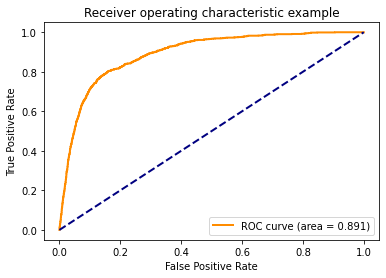

In [121]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label = 'ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

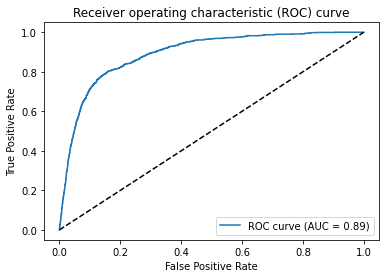

In [122]:
# Make predictions on test set
y_pred_proba = vote_classify.predict_proba(X_test)[:,1]  # predicted probabilities for positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

## Comapring the results

### Logistic Regression

In [56]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the resampling techniques
smote = SMOTE()
rus = RandomUnderSampler()

# Apply the resampling techniques to the training data
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, Y_train)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, Y_train)

# Train and evaluate logistic regression models on the resampled data
lr_smote = LogisticRegression()
lr_rus = LogisticRegression()

# Fit the logistic regression models on the SMOTE resampled data
lr_smote.fit(X_resampled_smote, y_resampled_smote)
y_pred_smote = lr_smote.predict(X_test)
print('SMOTE resampling results:')
print(classification_report(Y_test, y_pred_smote))

# Fit the logistic regression models on the RandomUnderSampler resampled data
lr_rus.fit(X_resampled_rus, y_resampled_rus)
y_pred_rus = lr_rus.predict(X_test)
print('RandomUnderSampler resampling results:')
print(classification_report(Y_test, y_pred_rus))

SMOTE resampling results:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      7413
           1       0.35      0.72      0.47      1027

    accuracy                           0.80      8440
   macro avg       0.65      0.77      0.68      8440
weighted avg       0.88      0.80      0.83      8440

RandomUnderSampler resampling results:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      7413
           1       0.35      0.72      0.47      1027

    accuracy                           0.80      8440
   macro avg       0.65      0.77      0.67      8440
weighted avg       0.88      0.80      0.83      8440



In [57]:
print(confusion_matrix(Y_test, y_pred_smote))

[[6040 1373]
 [ 287  740]]


In [58]:
print(confusion_matrix(Y_test, y_pred_rus))

[[6031 1382]
 [ 286  741]]


In [59]:
print(f1_score(Y_test, y_pred_smote),(f1_score(Y_test, y_pred_rus)))

0.47133757961783446 0.4704761904761904


### RandomForestClassifier

In [66]:
# Train and evaluate RandomForestClassifier on the resampled data
rf_smote = RandomForestClassifier(max_features=None, min_samples_leaf=10, n_estimators=180,
                       n_jobs=1, oob_score=True, random_state=42)
rf_rus = RandomForestClassifier(max_features=None, min_samples_leaf=10, n_estimators=180,
                       n_jobs=1, oob_score=True, random_state=42)

# Fit the RandomForestClassifier on the SMOTE resampled data
rf_smote.fit(X_resampled_smote, y_resampled_smote)
y_pred_smote = rf_smote.predict(X_test)
print('SMOTE resampling results:')
print(classification_report(Y_test, y_pred_smote))

# Fit the lRandomForestClassifier on the RandomUnderSampler resampled data
rf_rus.fit(X_resampled_rus, y_resampled_rus)
y_pred_rus = rf_rus.predict(X_test)
print('RandomUnderSampler resampling results:')
print(classification_report(Y_test, y_pred_rus))

SMOTE resampling results:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7413
           1       0.50      0.63      0.56      1027

    accuracy                           0.88      8440
   macro avg       0.73      0.77      0.75      8440
weighted avg       0.89      0.88      0.89      8440

RandomUnderSampler resampling results:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7413
           1       0.37      0.84      0.51      1027

    accuracy                           0.80      8440
   macro avg       0.67      0.82      0.69      8440
weighted avg       0.90      0.80      0.83      8440



In [67]:
print(confusion_matrix(Y_test, y_pred_smote))

[[6779  634]
 [ 381  646]]


In [68]:
print(f1_score(Y_test, y_pred_smote))

0.5600346770697875


In [69]:
print(confusion_matrix(Y_test, y_pred_rus))

[[5922 1491]
 [ 161  866]]


In [70]:
print(f1_score(Y_test, y_pred_rus))

0.5118203309692672


In [72]:
fpr, tpr, _ =  roc_curve(Y_test,rf_smote.predict_proba(X_test)[:,1])
roc_auc = auc(fpr,tpr)

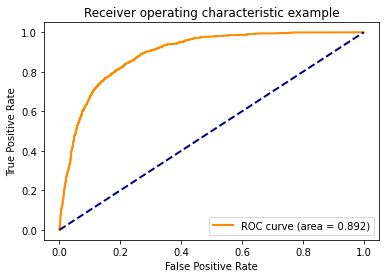

In [73]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label = 'ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

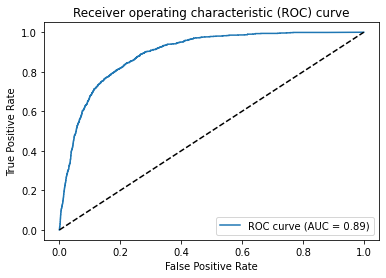

In [74]:
# Make predictions on test set
y_pred_proba = rf_smote.predict_proba(X_test)[:,1]  # predicted probabilities for positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

## Adaptive Synthetic Sampling (ADASYN)

In [141]:
from imblearn.over_sampling import ADASYN

# X and y represent your data and labels, respectively
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X,Y)

In [143]:
rf = RandomForestClassifier(n_estimators=110,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)

In [144]:
# Fit the Random Forest Classifier model on the ADASYN resampled data
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)
print('ADASYN resampling results:')
print(classification_report(Y_test, y_pred))

ADASYN resampling results:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7413
           1       0.63      0.03      0.05      1027

    accuracy                           0.88      8440
   macro avg       0.76      0.51      0.49      8440
weighted avg       0.85      0.88      0.83      8440



In [145]:
f1_score(Y_test, y_pred)

0.04868913857677903

## Trying Different Sampling Process To increase accuracy

In [161]:
# Feature Importance
feature_importances = pd.DataFrame({'feature': df1.columns, 'importance': rf_smote.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)
print(round(feature_importances,6))

                     feature  importance
0                   duration    0.415238
1                   previous    0.180702
2                      month    0.165076
3                   campaign    0.055680
4                 housing_no    0.039139
5                housing_yes    0.037269
6                    balance    0.028903
7                        age    0.021660
8                  age_group    0.019477
9         education_tertiary    0.005200
10           marital_married    0.004007
11       education_secondary    0.002969
12            job_management    0.002945
13            marital_single    0.002451
14            job_technician    0.002284
15           job_blue-collar    0.002213
16       balance_status_high    0.002074
17     balance_status_medium    0.001864
18               job_student    0.001482
19                 job_admin    0.001402
20        balance_status_low    0.001352
21                  loan_yes    0.001168
22                   loan_no    0.001121
23         educa

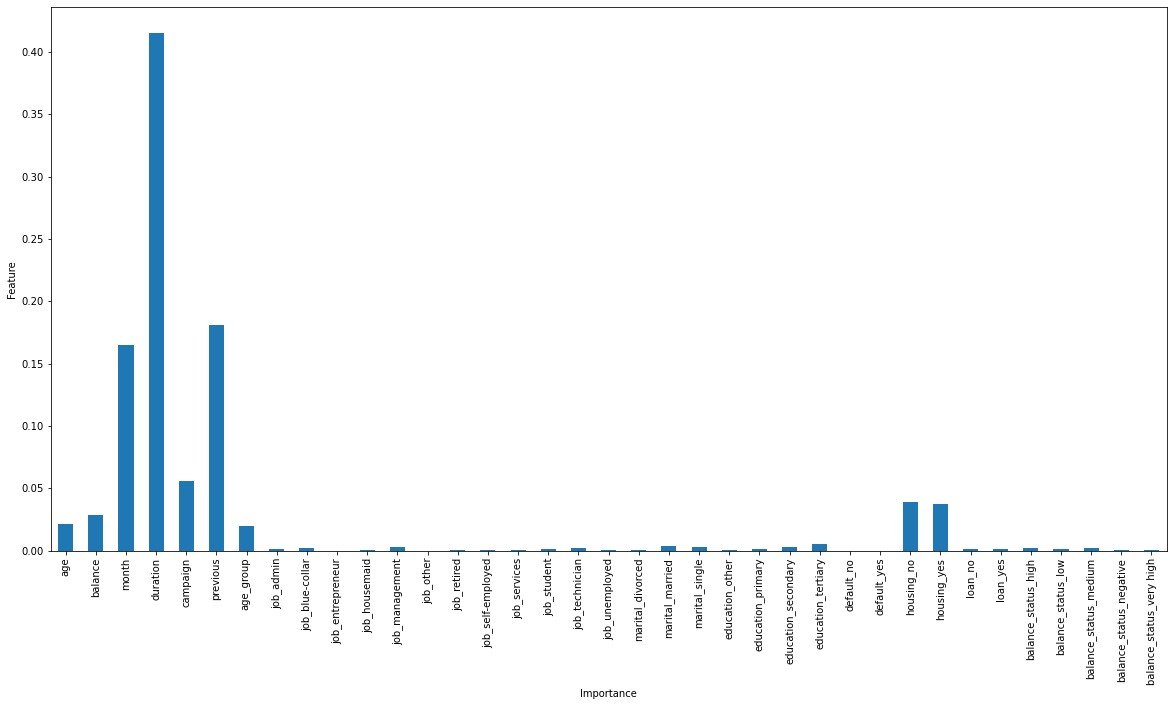

In [147]:
# get feature importances
importances = rf_smote.feature_importances_

# get the indices of the features sorted by importance
sorted_idx = importances.argsort()

# get the feature names and their importances
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)

# plot the feature importances
plt.figure(figsize=(20,10))
feature_importances.plot(kind='bar')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [162]:
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.model_selection import StratifiedKFold

In [163]:
# Select top K features using SelectFromModel
selector = SelectFromModel(rf_smote, threshold='mean', prefit=True)
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print(f"Selected {X_train_new.shape[1]} features: {list(df1.columns[selector.get_support()])}")

Selected 7 features: ['balance', 'month', 'duration', 'campaign', 'previous', 'housing_no', 'housing_yes']


In [179]:
# Select top K features using SelectFromModel
selector = SelectFromModel(rf_smote, threshold='median', prefit=True)
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print(f"Selected {X_train_new.shape[1]} features: {list(df1.columns[selector.get_support()])}")

Selected 19 features: ['age', 'balance', 'month', 'duration', 'campaign', 'previous', 'age_group', 'job_blue-collar', 'job_management', 'job_student', 'job_technician', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'housing_no', 'housing_yes', 'balance_status_high', 'balance_status_medium']


In [171]:
print(round(feature_importances,6))

                     feature  importance
0                   duration    0.415238
1                   previous    0.180702
2                      month    0.165076
3                   campaign    0.055680
4                 housing_no    0.039139
5                housing_yes    0.037269
6                    balance    0.028903
7                        age    0.021660
8                  age_group    0.019477
9         education_tertiary    0.005200
10           marital_married    0.004007
11       education_secondary    0.002969
12            job_management    0.002945
13            marital_single    0.002451
14            job_technician    0.002284
15           job_blue-collar    0.002213
16       balance_status_high    0.002074
17     balance_status_medium    0.001864
18               job_student    0.001482
19                 job_admin    0.001402
20        balance_status_low    0.001352
21                  loan_yes    0.001168
22                   loan_no    0.001121
23         educa

In [182]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with some hyperparameters
rf = RandomForestClassifier(n_estimators=110,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)

# Fit the classifier to the data
rf.fit(X_train, Y_train)

# Compute feature importances
importances = rf.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

age: 0.0927
balance: 0.0891
month: 0.1151
duration: 0.4414
campaign: 0.0234
previous: 0.0679
age_group: 0.0068
job_admin: 0.0030
job_blue-collar: 0.0046
job_entrepreneur: 0.0003
job_housemaid: 0.0004
job_management: 0.0067
job_other: 0.0000
job_retired: 0.0013
job_self-employed: 0.0006
job_services: 0.0011
job_student: 0.0027
job_technician: 0.0039
job_unemployed: 0.0009
marital_divorced: 0.0030
marital_married: 0.0091
marital_single: 0.0060
education_other: 0.0006
education_primary: 0.0021
education_secondary: 0.0076
education_tertiary: 0.0100
default_no: 0.0001
default_yes: 0.0001
housing_no: 0.0383
housing_yes: 0.0422
loan_no: 0.0037
loan_yes: 0.0039
balance_status_high: 0.0039
balance_status_low: 0.0029
balance_status_medium: 0.0036
balance_status_negative: 0.0003
balance_status_very high: 0.0005


In [183]:
a={}

In [184]:
for feature, importance in zip(X.columns, importances):
    a[feature]=importance

In [185]:
sorted_dict = dict(sorted(a.items(), key=lambda x: x[1], reverse=True))

In [186]:
# Print the sorted dictionary
for key, value in sorted_dict.items():
    print(key,":",round(value*100,2),"%")

duration : 44.14 %
month : 11.51 %
age : 9.27 %
balance : 8.91 %
previous : 6.79 %
housing_yes : 4.22 %
housing_no : 3.83 %
campaign : 2.34 %
education_tertiary : 1.0 %
marital_married : 0.91 %
education_secondary : 0.76 %
age_group : 0.68 %
job_management : 0.67 %
marital_single : 0.6 %
job_blue-collar : 0.46 %
job_technician : 0.39 %
loan_yes : 0.39 %
balance_status_high : 0.39 %
loan_no : 0.37 %
balance_status_medium : 0.36 %
job_admin : 0.3 %
marital_divorced : 0.3 %
balance_status_low : 0.29 %
job_student : 0.27 %
education_primary : 0.21 %
job_retired : 0.13 %
job_services : 0.11 %
job_unemployed : 0.09 %
education_other : 0.06 %
job_self-employed : 0.06 %
balance_status_very high : 0.05 %
job_housemaid : 0.04 %
balance_status_negative : 0.03 %
job_entrepreneur : 0.03 %
default_yes : 0.01 %
default_no : 0.01 %
job_other : 0.0 %


## PCA

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Initialize PCA and fit the data
pca = PCA()
pca.fit(X_std)

# Compute the amount of variance explained by each principal component
variance = pca.explained_variance_ratio_

# Get the column names from the original dataframe
col_names = X.columns

# Create a new dataframe to store the results
pca_results = pd.DataFrame({'Column Name': col_names,
                            'Variance Explained': variance})

# Print the results
print(round(pca_results,6))

                 Column Name  Variance Explained
0                        age            0.087074
1                    balance            0.074339
2                      month            0.062178
3                   duration            0.054298
4                   campaign            0.050935
5                   previous            0.049935
6                  age_group            0.042998
7                  job_admin            0.039813
8            job_blue-collar            0.035064
9           job_entrepreneur            0.033897
10             job_housemaid            0.032562
11            job_management            0.031856
12                 job_other            0.031065
13               job_retired            0.030152
14         job_self-employed            0.029072
15              job_services            0.028540
16               job_student            0.028290
17            job_technician            0.028123
18            job_unemployed            0.027597
19          marital_

In [190]:
print(round(feature_importances,6))

                     feature  importance
0                   duration    0.415238
1                   previous    0.180702
2                      month    0.165076
3                   campaign    0.055680
4                 housing_no    0.039139
5                housing_yes    0.037269
6                    balance    0.028903
7                        age    0.021660
8                  age_group    0.019477
9         education_tertiary    0.005200
10           marital_married    0.004007
11       education_secondary    0.002969
12            job_management    0.002945
13            marital_single    0.002451
14            job_technician    0.002284
15           job_blue-collar    0.002213
16       balance_status_high    0.002074
17     balance_status_medium    0.001864
18               job_student    0.001482
19                 job_admin    0.001402
20        balance_status_low    0.001352
21                  loan_yes    0.001168
22                   loan_no    0.001121
23         educa

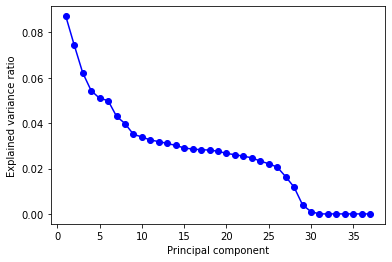

In [17]:
# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.show()

In [18]:
# Kaiser's Rule
# Find the number of principal components with eigenvalues > 1
n_components = len([eigval for eigval in pca.explained_variance_ if eigval > 1])

In [19]:
n_components

19

In [19]:
pca.explained_variance_

array([3.22181059e+00, 2.75060124e+00, 2.30063021e+00, 2.00908913e+00,
       1.88462643e+00, 1.84765597e+00, 1.59095894e+00, 1.47313377e+00,
       1.29739834e+00, 1.25420258e+00, 1.20483127e+00, 1.17870815e+00,
       1.14943737e+00, 1.11563881e+00, 1.07568355e+00, 1.05602245e+00,
       1.04676311e+00, 1.04057375e+00, 1.02113057e+00, 9.86843450e-01,
       9.64559858e-01, 9.41431127e-01, 9.14500912e-01, 8.61429920e-01,
       8.18380523e-01, 7.63365843e-01, 6.08536998e-01, 4.36911488e-01,
       1.49069536e-01, 3.69509941e-02, 8.54364459e-31, 6.99411726e-31,
       2.98931097e-31, 1.46133855e-31, 3.93377119e-32, 1.65175227e-32,
       6.96590097e-33])

In [24]:
l = pca_results['Column Name'].tolist()

In [26]:
len(l)

37

In [28]:
l1=l[:20]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define the pipeline for the PCA and logistic regression model
pipe = Pipeline([('pca', PCA()),
                 ('clf', RandomForestClassifier())])

# Define the parameter grid to search over
param_grid = {'pca__n_components': range(1, X.shape[1]+1)}

# Define the cross-validation object
cv = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# Fit the cross-validation object to the data
cv.fit(X_std, Y)

# Find the best number of principal components from the cross-validation results
n_components = cv.best_params_['pca__n_components']

In [22]:
n_components

25